## **Logistic Regression**

### **Import necessary libraries**

In [2]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### **Prepare train, test data**

In [3]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')

In [4]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Initalize model**

In [5]:
model = LogisticRegression(random_state=42)

In [6]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test)

In [8]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], shape=(19994,))

Accuracy:  0.9602380714214265
Recall:  0.6364705882352941
Precision:  0.8594122319301033
F1 Score:  0.7313281514025008


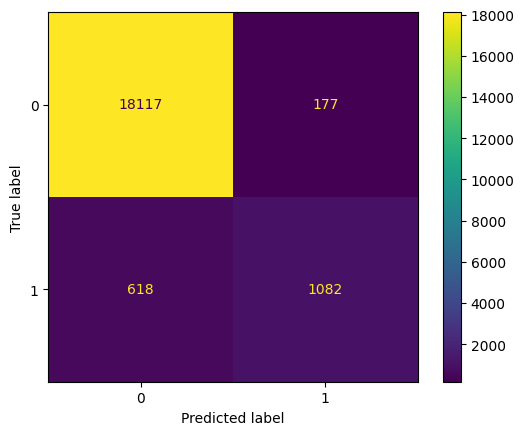

In [9]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### **Fine-tune hyperparameters**

In [10]:
finetuned_model = LogisticRegression(random_state=42)

In [11]:
# params_grid = {
#     "penalty": ["l1", "l2", "elasticnet", None],
#     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#     'class_weight': [None, 'balanced'],
#     'max_iter': [100, 200, 500, 1000],
#     "l1_ratio": [None, 0, 0.5, 1],
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

In [12]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best params is `{'C': 0.01, 'class_weight': None, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}`

In [13]:
best_model = LogisticRegression(
    C=0.01,
    class_weight=None,
    l1_ratio=None,
    max_iter=100,
    penalty="l1",
    solver='liblinear',
    random_state=42,
)

In [14]:
best_model.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [15]:
best_y_pred = best_model.predict(X_test)

Accuracy:  0.960888266479944
Recall:  0.6188235294117647
Precision:  0.8870151770657673
F1 Score:  0.729036729036729


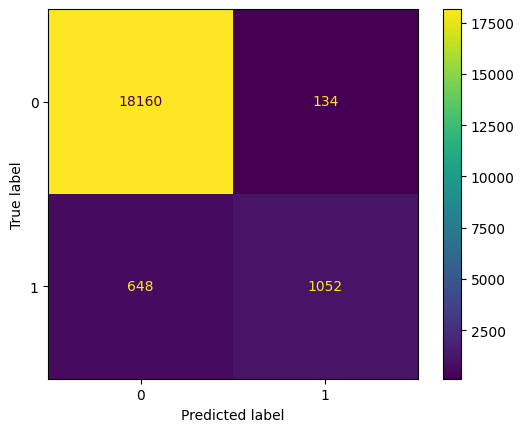

In [16]:
print("Accuracy: ", accuracy_score(y_test, best_y_pred))
print("Recall: ", recall_score(y_test, best_y_pred))
print("Precision: ", precision_score(y_test, best_y_pred))
print("F1 Score: ", f1_score(y_test, best_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_y_pred)).plot()